<a href="https://colab.research.google.com/github/Sweata1501/COVID-19/blob/master/Classification_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 13.9MB 303kB/s 
     |████████████████████████████████| 266kB 46.3MB/s 
     |████████████████████████████████| 276kB 47.3MB/s 
     |████████████████████████████████| 66.2MB 62kB/s 
     |████████████████████████████████| 174kB 47.8MB/s 
     |████████████████████████████████| 1.8MB 49.4MB/s 
     |████████████████████████████████| 6.8MB 42.6MB/s 
     |████████████████████████████████| 1.6MB 47.6MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 148.9MB 72kB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 163kB 39.9MB/s 
     |████████████████████████████████| 1.1MB 40.7MB/s 
     |████████████████████████████████| 6.0MB 39.8MB/s 
     |████████████████████████████████| 153kB 47.8MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 327kB 46.7MB/s

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
from pycaret.datasets import get_data
data=get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [5]:
train=data.sample(frac=0.75,random_state=123)
test=data.drop(train.index)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [7]:
from pycaret.classification import *
exp=setup(data=train,target='Purchase')

,Description,Value
0,session_id,4671
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(802, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8377,0.8939,0.7623,0.8238,0.7888,0.6576,0.6620,0.349
ridge,Ridge Classifier,0.8358,0.0000,0.7844,0.8045,0.7922,0.6569,0.6593,0.017
lda,Linear Discriminant Analysis,0.8323,0.8958,0.7755,0.8003,0.7853,0.6481,0.6509,0.018
ada,Ada Boost Classifier,0.8235,0.8720,0.7269,0.8174,0.7656,0.6253,0.6318,0.108
xgboost,Extreme Gradient Boosting,0.8216,0.8800,0.7672,0.7837,0.7739,0.6269,0.6285,0.279
rf,Random Forest Classifier,0.8199,0.8919,0.7498,0.7930,0.7671,0.6212,0.6255,0.503
gbc,Gradient Boosting Classifier,0.8198,0.8955,0.7409,0.8003,0.7636,0.6197,0.6257,0.121
lightgbm,Light Gradient Boosting Machine,0.8198,0.8764,0.7678,0.7846,0.7717,0.6237,0.6279,0.058
catboost,CatBoost Classifier,0.8181,0.8933,0.7316,0.8029,0.7606,0.6153,0.6214,1.326
et,Extra Trees Classifier,0.7789,0.8557,0.7184,0.7289,0.7209,0.5384,0.5413,0.464


In [9]:
logis=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,0.9348,0.8261,0.9048,0.8636,0.7782,0.7803
1,0.8571,0.8972,0.8261,0.8261,0.8261,0.7049,0.7049
2,0.8214,0.8735,0.6522,0.8824,0.7500,0.6159,0.6329
3,0.8571,0.9305,0.7273,0.8889,0.8000,0.6906,0.6990
4,0.8571,0.9171,0.7273,0.8889,0.8000,0.6906,0.6990
5,0.8036,0.9024,0.7273,0.7619,0.7442,0.5849,0.5853
6,0.8036,0.8971,0.8182,0.7200,0.7660,0.5979,0.6015
7,0.8750,0.9051,0.8182,0.8571,0.8372,0.7358,0.7364
8,0.8214,0.8168,0.7273,0.8000,0.7619,0.6196,0.6214
9,0.7857,0.8650,0.7727,0.7083,0.7391,0.5579,0.5594


In [10]:
tune_logis=tune_model(logis)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9298,0.9322,0.9130,0.9130,0.9130,0.8542,0.8542
1,0.8393,0.9025,0.7826,0.8182,0.8000,0.6658,0.6662
2,0.8214,0.8709,0.6522,0.8824,0.7500,0.6159,0.6329
3,0.8571,0.9345,0.7273,0.8889,0.8000,0.6906,0.6990
4,0.8393,0.9158,0.7273,0.8421,0.7805,0.6548,0.6592
5,0.8036,0.8984,0.7273,0.7619,0.7442,0.5849,0.5853
6,0.8036,0.8930,0.8182,0.7200,0.7660,0.5979,0.6015
7,0.8750,0.9131,0.8182,0.8571,0.8372,0.7358,0.7364
8,0.8214,0.8128,0.7273,0.8000,0.7619,0.6196,0.6214
9,0.7857,0.8610,0.7727,0.7083,0.7391,0.5579,0.5594


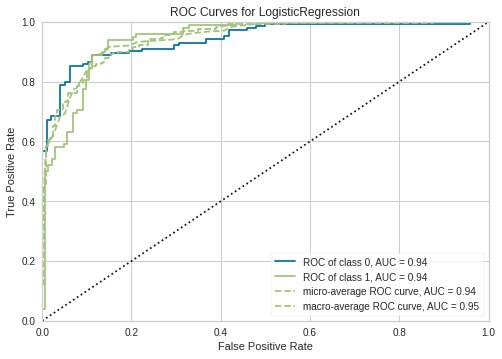

In [12]:
plot_model(tune_logis)

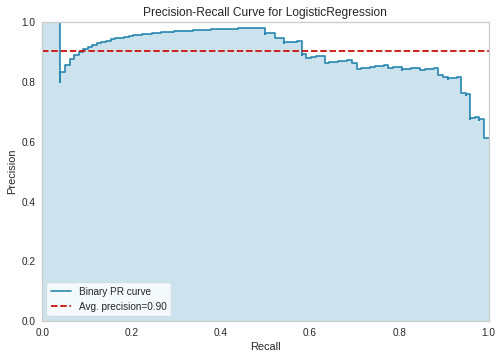

In [13]:
plot_model(tune_logis,plot='pr')

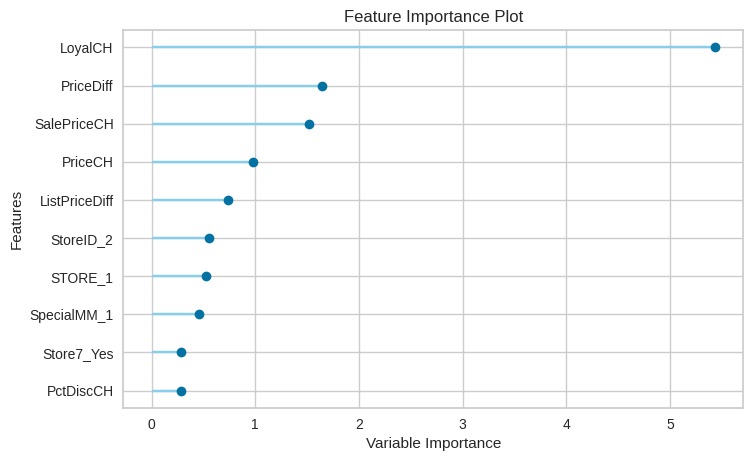

In [14]:
plot_model(tune_logis,plot='feature')

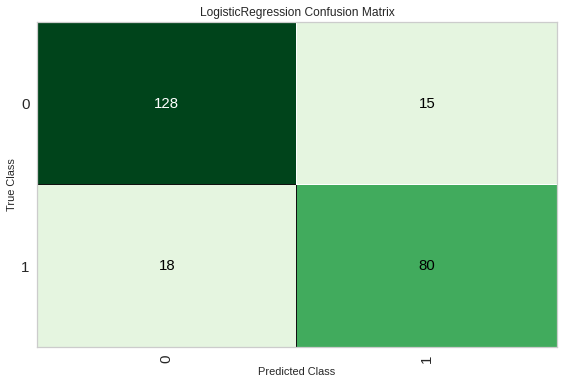

In [16]:
plot_model(tune_logis,plot='confusion_matrix')

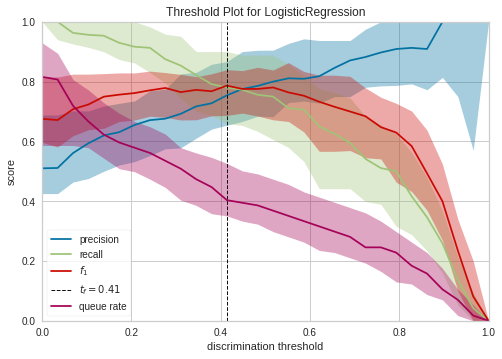

In [21]:
plot_model(tune_logis,plot='threshold')

In [17]:
predict_model(tune_logis)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8631,0.9431,0.8163,0.8421,0.829,0.7149,0.7151


,Id,WeekofPurchase,PriceCH,PriceMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_2,StoreID_4,SpecialCH_1,SpecialMM_1,Store7_Yes,STORE_1,STORE_3,Purchase,Label,Score
0,440.0,251.0,1.76,2.09,0.480000,2.09,1.76,0.33,0.000000,0.000000,0.33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,CH,CH,0.6328
1,160.0,266.0,1.99,2.09,0.965640,2.09,1.89,0.20,0.000000,0.050251,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CH,CH,0.9701
2,424.0,235.0,1.69,1.99,0.548160,1.99,1.69,0.30,0.000000,0.000000,0.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CH,CH,0.6854
3,29.0,274.0,1.86,2.13,0.932891,1.59,1.39,0.20,0.253521,0.252688,0.27,0.0,0.0,1.0,0.0,1.0,0.0,0.0,CH,CH,0.9888
4,600.0,260.0,1.86,2.13,0.944165,1.89,1.86,0.03,0.112676,0.000000,0.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,CH,CH,0.9556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,158.0,264.0,1.99,2.09,0.946313,2.09,1.89,0.20,0.000000,0.050251,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CH,CH,0.9660
237,204.0,231.0,1.69,1.99,0.635200,1.99,1.69,0.30,0.000000,0.000000,0.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,CH,CH,0.8975
238,726.0,275.0,2.09,2.09,0.000014,1.69,2.09,-0.40,0.191388,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MM,MM,0.9806
239,590.0,251.0,1.86,2.09,0.480000,2.09,1.76,0.33,0.000000,0.053763,0.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,CH,CH,0.7500


In [18]:
prediction=predict_model(tune_logis,data=test)
prediction.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.8692
1,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.6273
2,9,CH,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.9614
3,11,CH,240,7,1.86,2.09,0.00,0.0,0,0,0.988606,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0,CH,0.9767
4,15,CH,278,7,2.06,2.13,0.00,0.0,0,0,0.744000,2.13,2.06,0.07,Yes,0.000000,0.000000,0.07,0,CH,0.8870


In [23]:
prediction['Purchase']

0      CH
1      MM
2      CH
3      CH
4      CH
       ..
263    CH
264    CH
265    CH
266    CH
267    CH
Name: Purchase, Length: 268, dtype: object

In [24]:
test.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
1,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
2,9,CH,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
3,11,CH,240,7,1.86,2.09,0.00,0.0,0,0,0.988606,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0
4,15,CH,278,7,2.06,2.13,0.00,0.0,0,0,0.744000,2.13,2.06,0.07,Yes,0.000000,0.000000,0.07,0


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Purchase'],prediction['Purchase'])

array([[172,   0],
       [  0,  96]])